In [1]:
# import all the E9 stuff
import logging
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1,
    "C:\\Users\\ken92\\Documents\\Studies\\E5\\simulation\\E9_simulations")
import E9_fn.E9_constants as E9c
import E9_fn.E9_atom as E9a
import E9_fn.E9_cooltrap as E9ct
from E9_fn import util

# Logging
logpath = '' # '' if not logging to a file
loglevel = logging.INFO
logroot = logging.getLogger()
list(map(logroot.removeHandler, logroot.handlers))
list(map(logroot.removeFilter, logroot.filters))
logging.basicConfig(filename = logpath, level = loglevel)

c:\Users\ken92\Documents\Studies\E5\simulation\E9_simulations\.venv\Lib\site-packages\gftool\precision.py:16: UserWarning: No quad precision datatypes available!
Some functions might be less accurate.
  warnings.warn("No quad precision datatypes available!\n"


# Unplugged magnetic trap
This section looks at different properties at a range of quadrupole field gradients
TODO: this code is pretty old, might want to go through it again

## Inputs

In [2]:
B_grad = np.linspace(5, 70)             # (For B trap) [G/cm] (xy-plane) B field gradient
N_all = .8e9                            # number of atoms; includes all spin species
Ts = [500e-6, 300e-6, 200e-6, 100e-6]   # Temperatures to look at
a_s = 95 * E9c.a0                       # Scattering length; need to find the reference

## Collision rates

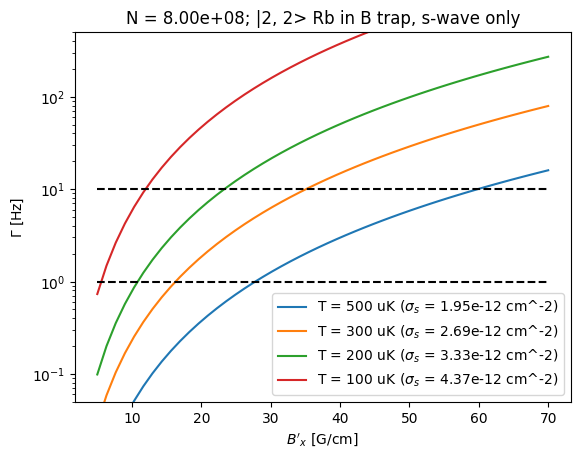

In [3]:
# print(E9n.Rb87_5_2S1o2_F2.gF * E9c.mu_B * 2 / E9c.hnobar / 1e4 / 1e6)
V_grad = B_grad * 100 * 1.4e6 * E9c.hnobar  # [J/m] potential gradient
fig = plt.figure()
ax = fig.add_subplot(111)
# xsection = 8 * np.pi * a_s**2               # making probing p.49
for T in Ts:
    n = E9ct.n_peak_lin(N_all, V_grad, T)   # peak density
    k_T = np.sqrt(E9c.k_B * T * E9c.m_Rb87) / E9c.hbar
    xsection = E9a.xsection_s(a_s, k_T, x2 = True)
    line_label = "T = {} uK (".format(int(T * 1e6)) + r"$\sigma_s$" \
                + " = {:.2e} cm^-2)".format(xsection * 1e4)
    collision_rate = E9ct.collision_rate(n, xsection, E9c.m_Rb87, T)
    ax.plot(B_grad, collision_rate, label = line_label)
    # print("T = {}: (ak)**2 = {}".format(T, (a_s * k_T)**2))
ax.set_title("N = {:.2e}; |2, 2> Rb in B trap, s-wave only".format(N_all))
ax.set_xlabel(r"$B'_x$" + " [G/cm]")
ax.set_ylabel(r"$\Gamma$" + " [Hz]")
ax.set_yscale("log")
ax.set_ylim(0.05, 500)
ax.legend()
ax.hlines([1, 10], B_grad[0], B_grad[-1], colors = "k", linestyles = "--")

In [4]:
B_grad = 50. / 100
T_rf_evap = 15e-6
print(E9ct.majorana_loss_rate(E9a.Rb87_5_2S1o2_F1, B_grad, T_rf_evap))
print(E9ct.majorana_loss_rate(E9a.Rb87_5_2S1o2_F2, B_grad, T_rf_evap))
print(E9ct.majorana_loss_rate(E9a.K40_4_2S1o2_F9o2, B_grad, T_rf_evap))

print(E9ct.majorana_loss_radius(E9a.Rb87_5_2S1o2_F2, B_grad, T_rf_evap))
print(E9ct.majorana_loss_radius(E9a.K40_4_2S1o2_F9o2, B_grad, T_rf_evap))

0.16943349861108978
0.8829218790387079
2.4421213126845034
2.9440780477316416e-06
4.547228686385588e-06
